In [1]:
# install ClarifAi
!pip install clarifai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.5/193.5 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.4/224.4 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.3 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.2.0 which is incompatible.


In [5]:
# Provide Clarifai User Key
%env CLARIFAI_PAT =

env: CLARIFAI_PAT=


In [3]:
# Import Model and Input
from clarifai.client.model import Model

# Provide a Prompt or Question statement for the image
prompt = '''with smoke, half ice and half fire and ultra realistic in detail.wolf,
typography, dark fantasy, wildlife photography, vibrant, cinematic and on a black background'''

# Setting the inference parameters
inference_params = dict(quality="standard" , size= "1024x1024")

# Using the model Dall-e-3 to generate image
# Passing the prompt and inference parameters
model_prediction = Model("https://clarifai.com/openai/dall-e/models/dall-e-3").predict_by_bytes(prompt.encode(), input_type="text",inference_params = inference_params)

# Storing the output
output = model_prediction.outputs[0].data.image.base64

# Storing the Image in image.png
with open("image.png","wb") as f:
  f.write(output)

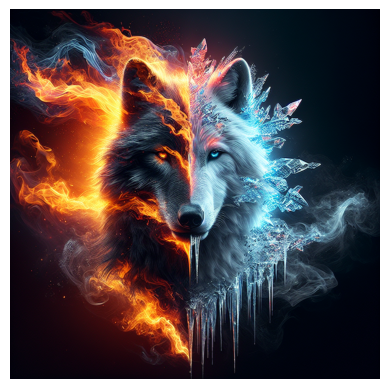

In [4]:
# Display the image
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Base64 image to numpy array
im_b = model_prediction.outputs[0].data.image.base64
image_np = np.frombuffer(im_b, np.uint8)
img_np = cv2.imdecode(image_np, cv2.IMREAD_COLOR)

plt.axis('off')
plt.imshow(img_np[...,::-1])